In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)


In [5]:
# Load feature datasets
daily_features_path = "../lake/daily_features.parquet"
fivemin_features_path = "../lake/fivemin_features.parquet"

# Check if files exist
daily_exists = Path(daily_features_path).exists()
fivemin_exists = Path(fivemin_features_path).exists()

print(f"Daily features available: {daily_exists}")
print(f"5-min features available: {fivemin_exists}")

if daily_exists:
    daily_df = pd.read_parquet(daily_features_path)
    print(f"\nDaily features loaded: {len(daily_df):,} rows, {len(daily_df.columns)} columns")
    print(f"Symbols: {daily_df['symbol'].nunique()}")
    print(f"Date range: {daily_df['ts_utc'].min().date()} to {daily_df['ts_utc'].max().date()}")
else:
    daily_df = None

if fivemin_exists:
    fivemin_df = pd.read_parquet(fivemin_features_path) 
    print(f"\n5-min features loaded: {len(fivemin_df):,} rows, {len(fivemin_df.columns)} columns")
    print(f"Symbols: {fivemin_df['symbol'].nunique()}")
    print(f"Datetime range: {fivemin_df['ts_utc'].min()} to {fivemin_df['ts_utc'].max()}")
else:
    fivemin_df = None


Daily features available: True
5-min features available: True

Daily features loaded: 395,672 rows, 19 columns
Symbols: 89
Date range: 2000-01-04 to 2025-03-28

5-min features loaded: 4,505,995 rows, 27 columns
Symbols: 4
Datetime range: 2008-05-04 17:15:00 to 2024-12-29 20:50:00


✅ Daily Features Loaded Successfully!
Shape: (395672, 19)
Columns: ['ts_utc', 'symbol', 'open', 'high', 'low', 'close', 'volume', 'ln_ret_1', 'mom_20', 'vol_20', 'mom_5', 'vol_5', 'gap_pc', 'hl_range_pc', 'vol_z_20', 'sector_id', 'day_of_week', 'month', 'price_sma20_dev']


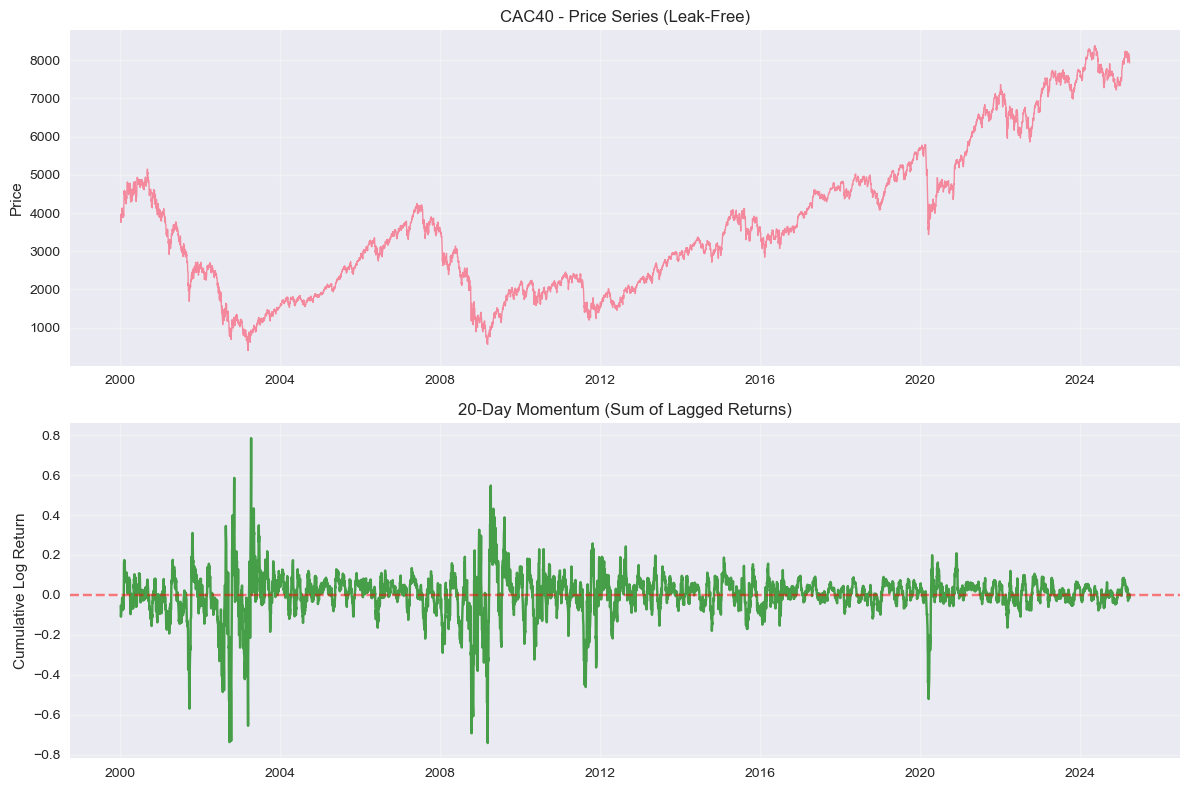

\n📊 Sample data for CAC40:
          ts_utc   close  ln_ret_1    mom_20    vol_20
23192 2025-03-24  8032.0 -0.002611 -0.016014  0.151825
23193 2025-03-25  8118.5  0.010712 -0.010712  0.149682
23194 2025-03-26  8047.0 -0.008846  0.004939  0.153827
23195 2025-03-27  8004.0 -0.005358 -0.015231  0.151203
23196 2025-03-28  7929.5 -0.009351 -0.015189  0.151186


In [6]:
if daily_df is not None:
    # Show basic info
    print("✅ Daily Features Loaded Successfully!")
    print(f"Shape: {daily_df.shape}")
    print(f"Columns: {list(daily_df.columns)}")
    
    # Pick a sample symbol and show price + momentum
    sample_symbol = daily_df['symbol'].value_counts().index[0]
    symbol_data = daily_df[daily_df['symbol'] == sample_symbol].sort_values('ts_utc')
    
    if len(symbol_data) > 0:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
        
        # Price chart
        ax1.plot(symbol_data['ts_utc'], symbol_data['close'], alpha=0.8, linewidth=1)
        ax1.set_title(f'{sample_symbol} - Price Series (Leak-Free)')
        ax1.set_ylabel('Price')
        ax1.grid(True, alpha=0.3)
        
        # Momentum chart
        if 'mom_20' in symbol_data.columns:
            ax2.plot(symbol_data['ts_utc'], symbol_data['mom_20'], alpha=0.7, color='green')
            ax2.set_title('20-Day Momentum (Sum of Lagged Returns)')
            ax2.set_ylabel('Cumulative Log Return')
            ax2.axhline(0, color='red', linestyle='--', alpha=0.5)
            ax2.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print(f"\\n📊 Sample data for {sample_symbol}:")
        print(symbol_data[['ts_utc', 'close', 'ln_ret_1', 'mom_20', 'vol_20']].tail())
